<a href="https://colab.research.google.com/github/carinacunha/fashion-mnist/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Challenge 2 - Fashion MNIST <center>

![mnist](https://peltarion.com/static/fashion-mnist_long.png)

## Step 1: Define the problem

Develop an algorithm to classify clothing images in different categories. This is a classification problem that will be solved using supervised learning. 


## Step 2 - Gather the Data
In this project was used a dataset called "Fashion MNIST". More information about the dataset was available at Keras library in the [link](https://keras.io/api/datasets/fashion_mnist/).



## Step 3: Prepare Data

The data was provided to us from Zalando's article images, so just feature engeneering will be done.

### 3.1 Import libraries

In [ ]:
import tensorflow
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l2

### 3.2 Meet data
The dataset Fashion Mnist (x_train and y_train and x_test and y_test) will be import of the Keras library using the function load_data().

In [ ]:
# Import keras dataset (train and test datasets)
dataset = keras.datasets.fashion_mnist
((x_train, y_train), (x_test, y_test)) = dataset.load_data()

In [ ]:
print(f'x_train: {x_train.shape[0]} images with {x_train.shape[1]}x{x_train.shape[2]} pixels')
print(f'x_train:{len(y_train)}')
print(f'x_test: {x_test.shape[0]} images with {x_test.shape[1]}x{x_test.shape[2]} pixels')
print(f'y_test:{len(y_test)}')

x_train: 60000 images with 28x28 pixels
x_train:60000
x_test: 10000 images with 28x28 pixels
y_test:10000


In [ ]:
print(type(y_train))
print(f'y_train: {y_train.min()} to {y_train.max()}.')
print(f'y_test: {y_test.min()} to {y_test.max()}.')

<class 'numpy.ndarray'>
y_train: 0 to 9.
y_test: 0 to 9.


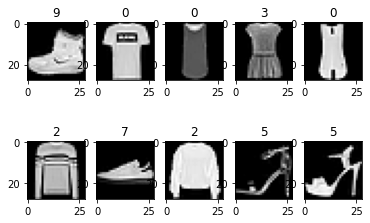

In [ ]:
# Visualization of the images with their labels
for image in range(10):
    plt.subplot(2, 5, image + 1)
    plt.imshow(x_train[image], cmap='gray')
    plt.title(y_train[image])

The train dataset is composed by 60000 grayscale images (2 dimensions - 2D) with 28x28 pixels. Each image has a label (y_train).
The test dataset is composed by 10000 grayscale images with 28x28 pixels and each image has a label too. The y_train and y_test dataset are arrays formed by 10 clothes classes that are represent by a number ranging 0 to 9 as you can see above:

Label|Description
:---:|:----------:
0|T-shirt/top
1|Trouser
2|Pullover
3|Dress
4|Coat
5|Sandal
6|Shirt
7|Sneaker
8|Bag
9|Ankle boot

### 3.3 Data preparation


* Normalize the grayscale

As you can see above the grayscale from 0 (black) to 255 (white). To reduce this variability and minimize the model loss, the grayscale values will be normalize.

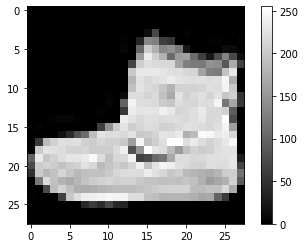

In [ ]:
# Visualization grayscale 
plt.imshow(x_train[0], cmap='gray')
plt.colorbar()

In [ ]:
# Normalization of images grayscale to values between 0 and 1 
x_train = x_train/float(255)
x_test = x_test/float(255)

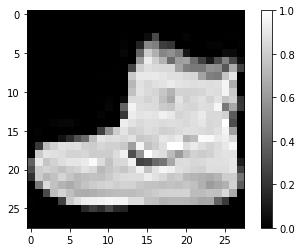

In [ ]:
# Visualization grayscale after normalization
plt.imshow(x_train[0], cmap = 'gray')
plt.colorbar()

## Set 4. Creating the model

The algorithm used to solve this classification problem will be a specific type of neural network commonly used for image classification, the Convolucional Neural Network (CNN). The CNN will formed by two parts:
* First part: convolutional layers to make feature extraction and transformation
* Second part: multilayer perceptron that will find patterns in the images and classify them.


### 4.1 Reshape train and test dataset to a format batch_shape + (rows, cols, channels)

In [ ]:
#Visualization x_train and x_test dataset shape
print(x_train[0].shape)
print(x_test[0].shape)

(28, 28)
(28, 28)


To create the CNN we will use the Keras function Conv2D. This function expects input data format with four dimensions (batch_shape, rows, cols, channels). Before create the model, we need reshape the data to this format.

In [ ]:
# Add the dimension channel in input_shape
sample_shape = x_train[0].shape
img_width, img_height = sample_shape[0], sample_shape[1]
input_shape = (img_width, img_height, 1)
input_shape

(28, 28, 1)

In [ ]:
# Add the batch_shape in input_shape
x_train = x_train.reshape(len(x_train), input_shape[0], input_shape[1], input_shape[2])
x_test  = x_test.reshape(len(x_test), input_shape[0], input_shape[1], input_shape[2])
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### 4.2 Create the CNN

Considering that neural networks are complex models and prone to overfitting, we will use some regularization techniques to avoid it, like:

* [L2 regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization)
* [Dropout](https://en.wikipedia.org/wiki/Dilution_(neural_networks)
* [Early stopping](https://en.wikipedia.org/wiki/Early_stopping) 

In [ ]:
# First part: Convolutional neural network
model = keras.Sequential([
    
    keras.layers.Conv2D(filters = 256, kernel_size = (3,3), padding = 'same',
    activation = 'relu', input_shape = input_shape, data_format = 'channels_last',
    kernel_regularizer = l2 (0.0003)),

    keras.layers.Conv2D(filters = 124, kernel_size = (3,3), padding = 'same',
    activation = 'relu',  kernel_regularizer = l2 (0.0003)),

    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',
    activation = 'relu',  kernel_regularizer = l2 (0.0003)),

    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same',
    activation = 'relu',  kernel_regularizer = l2 (0.0003)),
    keras.layers.Dropout(0.25),

    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    
# Second part: Multilayer perceptron
    keras.layers.Dense(128, activation = 'relu',  kernel_regularizer = l2 (0.0001)),
    keras.layers.Dense(64, activation = 'relu', kernel_regularizer = l2 (0.0001)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation = 'softmax',  kernel_regularizer = l2 (0.0001))])

In [ ]:
# Compile the model
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 124)       285820    
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 64)        71488     
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 dropout_9 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [ ]:
# Stop training when a monitored metric has stopped improving and save the best model
callbacks = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 1),
            keras.callbacks.ModelCheckpoint(filepath = 'best_model.hdf5',
                                            monitor = 'val_loss', save_best_only = True)]

# Train the model and validation
history = model.fit(x_train, y_train, epochs = 6,
                    validation_split = 0.15, callbacks = callbacks)

Epoch 1/6
1594/1594 [==============================] - 50s 31ms/step - loss: 0.5061 - accuracy: 0.8420 - val_loss: 0.3615 - val_accuracy: 0.8914
Epoch 2/6
1594/1594 [==============================] - 49s 30ms/step - loss: 0.3471 - accuracy: 0.9006 - val_loss: 0.3515 - val_accuracy: 0.8986
Epoch 3/6
1594/1594 [==============================] - 48s 30ms/step - loss: 0.3120 - accuracy: 0.9152 - val_loss: 0.3096 - val_accuracy: 0.9181
Epoch 4/6
1594/1594 [==============================] - 48s 30ms/step - loss: 0.2961 - accuracy: 0.9223 - val_loss: 0.3064 - val_accuracy: 0.9189
Epoch 5/6
1594/1594 [==============================] - 48s 30ms/step - loss: 0.2798 - accuracy: 0.9285 - val_loss: 0.3115 - val_accuracy: 0.9217


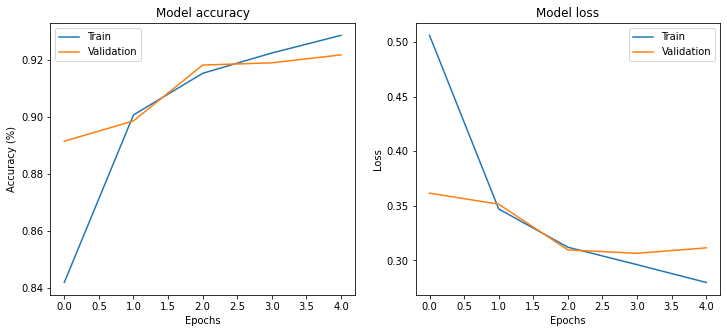

In [ ]:
# Accuracy visualization
fig, axes = plt.subplots(1, 2, figsize = (12, 5), sharey=True)

plt.subplot(121)
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Validation'])

# Loss vizualization
plt.subplot(122)
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'])

## Step 5: Predict


In [ ]:
# Predict the classification of the x_test dataset
test = model.predict(x_test)

In [ ]:
# Metric and loss visualization
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 4s 11ms/step - loss: 0.3219 - accuracy: 0.9142
Test loss: 0.3218931257724762
Test accuracy: 0.9142000079154968


## Step 6: Conclusion
This notebook implemeted one possible solution for dataset "Fashion MNIST" using neural networks. The data were processed and visualized. Than a convolucional neural network was built to classify the clothes images. To improve those results and reduce the possible overfitting, regularization techniques were used and the model accuracy in test dataset was 91%.
